<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Neural-Network/blob/main/02%20-%20Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

# 그레디언트 소실과 폭주
## 1.글로럿과 He 초기화

In [2]:
[initializer for initializer in dir(keras.initializers) if not initializer.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## 2.수렴하지 않는 활성화 함수

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
z = np.linspace(-5, 5, 200)
z

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

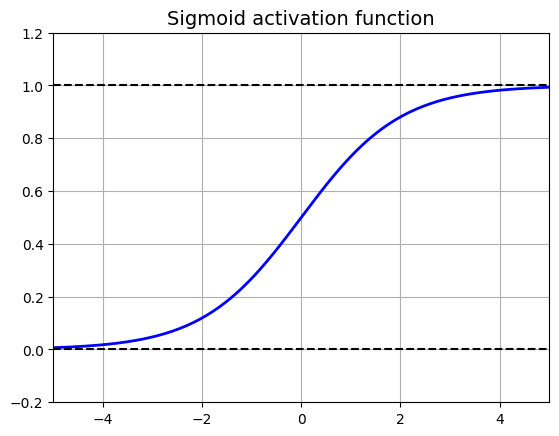

In [7]:
# 로지스틱 시그모이드 함수
def logit(z):
    return 1 / (1 + np.exp(-z))

plt.plot(z, logit(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [8]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="sigmoid",
                       kernel_initializer=tf.keras.initializers.RandomNormal(0.0, 1.0)),
    keras.layers.Dense(100, activation="sigmoid",
                       kernel_initializer=tf.keras.initializers.RandomNormal(0.0, 1.0)),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 9ms/step - loss: 2.2167 - accuracy: 0.1966 - val_loss: 2.0225 - val_accuracy: 0.3232
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.8993 - accuracy: 0.4070 - val_loss: 1.7631 - val_accuracy: 0.4938
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6778 - accuracy: 0.5189 - val_loss: 1.5714 - val_accuracy: 0.5690
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 1.5123 - accuracy: 0.5765 - val_loss: 1.4264 - val_accuracy: 0.6100
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3868 - accuracy: 0.6107 - val_loss: 1.3170 - val_accuracy: 0.6458
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 1.2897 - accuracy: 0.6346 - val_loss: 1.2304 - val_accuracy: 0.6582
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.2132 - accuracy: 0.6512 - val_loss: 1.1621 - val_accur

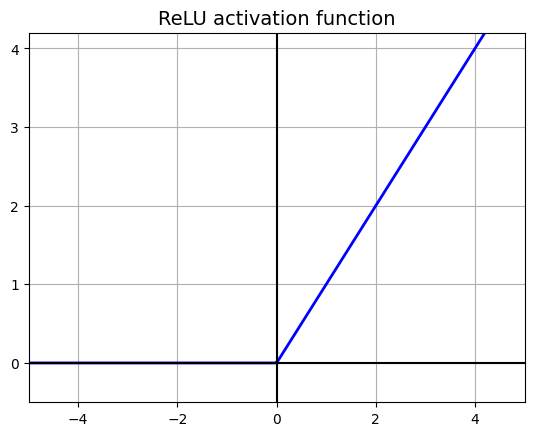

In [10]:
# ReLU
def relu(z):
    return np.maximum(0, z)

plt.plot(z, relu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [11]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 re_lu (ReLU)                (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 re_lu_1 (ReLU)              (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.3165 - accuracy: 0.6034 - val_loss: 0.9007 - val_accuracy: 0.7084
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8074 - accuracy: 0.7310 - val_loss: 0.7215 - val_accuracy: 0.7662
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6900 - accuracy: 0.7705 - val_loss: 0.6515 - val_accuracy: 0.7876
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6276 - accuracy: 0.7934 - val_loss: 0.5951 - val_accuracy: 0.8026
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5866 - accuracy: 0.8061 - val_loss: 0.5605 - val_accuracy: 0.8176
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5572 - accuracy: 0.8143 - val_loss: 0.5366 - val_accuracy: 0.8234
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5351 - accuracy: 0.8200 - val_loss: 0.5160 - val_accuracy:

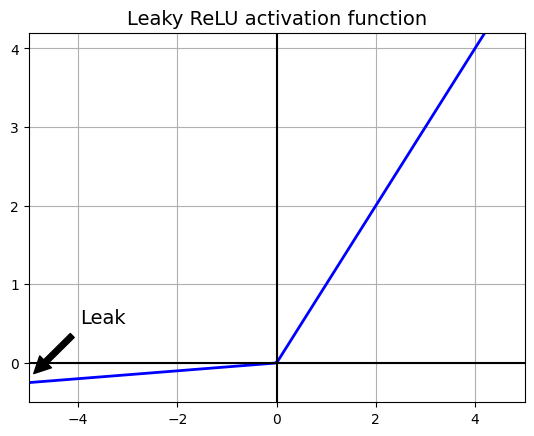

In [13]:
# Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [14]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(0.01),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(0.01),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 1.3366 - accuracy: 0.5921 - val_loss: 0.9090 - val_accuracy: 0.7030
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8132 - accuracy: 0.7314 - val_loss: 0.7227 - val_accuracy: 0.7660
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6900 - accuracy: 0.7752 - val_loss: 0.6500 - val_accuracy: 0.7918
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6259 - accuracy: 0.7957 - val_loss: 0.5910 - val_accuracy: 0.8160
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5849 - accuracy: 0.8084 - val_loss: 0.5572 - val_accuracy: 0.8244
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5558 - accuracy: 0.8159 - val_loss: 0.5332 - val_accuracy: 0.8318
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5340 - accuracy: 0.8207 - val_loss: 0.5128 - val_accuracy

In [16]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 p_re_lu (PReLU)             (None, 300)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 p_re_lu_1 (PReLU)           (None, 100)               100       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 267010 (1.02 MB)
Trainable params: 267010 

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.4452 - accuracy: 0.5738 - val_loss: 0.9536 - val_accuracy: 0.7150
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8396 - accuracy: 0.7338 - val_loss: 0.7363 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7038 - accuracy: 0.7732 - val_loss: 0.6573 - val_accuracy: 0.7884
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6365 - accuracy: 0.7927 - val_loss: 0.5982 - val_accuracy: 0.8096
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5938 - accuracy: 0.8058 - val_loss: 0.5638 - val_accuracy: 0.8190
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5634 - accuracy: 0.8133 - val_loss: 0.5387 - val_accuracy: 0.8242
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5406 - accuracy: 0.8202 - val_loss: 0.5185 - val_accurac

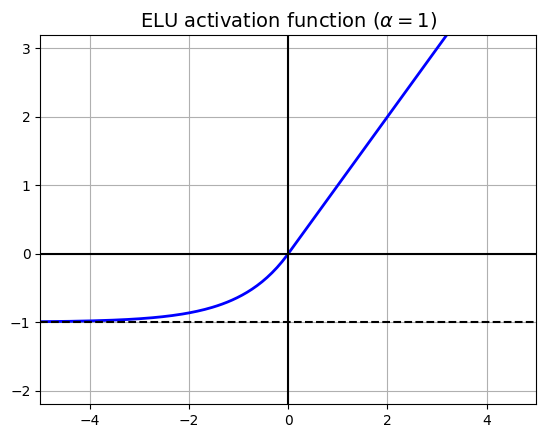

In [18]:
# ELU
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1347 - accuracy: 0.6360 - val_loss: 0.7832 - val_accuracy: 0.7494
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7227 - accuracy: 0.7620 - val_loss: 0.6502 - val_accuracy: 0.7884
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6329 - accuracy: 0.7899 - val_loss: 0.5960 - val_accuracy: 0.7984
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5843 - accuracy: 0.8033 - val_loss: 0.5516 - val_accuracy: 0.8156
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5525 - accuracy: 0.8133 - val_loss: 0.5256 - val_accuracy: 0.8250
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5295 - accuracy: 0.8191 - val_loss: 0.5067 - val_accuracy: 0.8298
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5121 - accuracy: 0.8250 - val_loss: 0.4911 - val_accuracy

In [21]:
# SELU
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

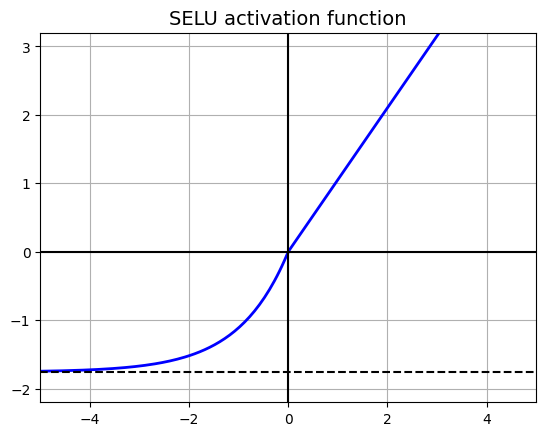

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [23]:
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - means) / stds
X_valid_scaled = (X_valid - means) / stds

In [24]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(100):
  keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal")
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_101 (Dense)           (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7482 - accuracy: 0.7450 - val_loss: 0.5477 - val_accuracy: 0.8166
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5220 - accuracy: 0.8186 - val_loss: 0.4844 - val_accuracy: 0.8366
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4794 - accuracy: 0.8336 - val_loss: 0.4640 - val_accuracy: 0.8436
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4560 - accuracy: 0.8413 - val_loss: 0.4463 - val_accuracy: 0.8492
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4402 - accuracy: 0.8481 - val_loss: 0.4346 - val_accuracy: 0.8546
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4281 - accuracy: 0.8525 - val_loss: 0.4269 - val_accuracy: 0.8574
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4187 - accuracy: 0.8554 - val_loss: 0.4193 - val_accuracy:

In [26]:
[activation for activation in dir(keras.activations) if not activation.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [27]:
[layer for layer in dir(keras.layers) if "relu" in layer.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

## 3.배치 정규화

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_102 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_103 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.8150 - accuracy: 0.7211 - val_loss: 0.5482 - val_accuracy: 0.8064
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5654 - accuracy: 0.8025 - val_loss: 0.4730 - val_accuracy: 0.8358
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5125 - accuracy: 0.8208 - val_loss: 0.4419 - val_accuracy: 0.8408
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4759 - accuracy: 0.8338 - val_loss: 0.4218 - val_accuracy: 0.8472
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4510 - accuracy: 0.8412 - val_loss: 0.4068 - val_accuracy: 0.8538
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4361 - accuracy: 0.8453 - val_loss: 0.3958 - val_accuracy: 0.8558
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4231 - accuracy: 0.8499 - val_loss: 0.3860 - val_ac

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_105 (Dense)           (None, 300)               235200    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_106 (Dense)           (None, 100)              

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0015 - accuracy: 0.6863 - val_loss: 0.6560 - val_accuracy: 0.7912
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6609 - accuracy: 0.7850 - val_loss: 0.5426 - val_accuracy: 0.8194
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5830 - accuracy: 0.8068 - val_loss: 0.4929 - val_accuracy: 0.8328
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5344 - accuracy: 0.8199 - val_loss: 0.4610 - val_accuracy: 0.8418
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5031 - accuracy: 0.8282 - val_loss: 0.4394 - val_accuracy: 0.8494
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4813 - accuracy: 0.8341 - val_loss: 0.4232 - val_accuracy: 0.8534
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4656 - accuracy: 0.8395 - val_loss: 0.4107 - val_ac

## 4.그레디언트 클리핑

In [32]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

In [33]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="mse", optimizer=optimizer)

# 전이학습
## 1.데이터 준비

In [34]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [35]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

## 2.작업 A를 수행하기 위한 모델 A 훈련

In [36]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 8)                 4

In [37]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 8s 6ms/step - loss: 0.5618 - accuracy: 0.8177 - val_loss: 0.3917 - val_accuracy: 0.8635
Epoch 2/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.3516 - accuracy: 0.8776 - val_loss: 0.3281 - val_accuracy: 0.8911
Epoch 3/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.3173 - accuracy: 0.8889 - val_loss: 0.3036 - val_accuracy: 0.8999
Epoch 4/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2989 - accuracy: 0.8952 - val_loss: 0.2900 - val_accuracy: 0.9043
Epoch 5/20
1375/1375 [==============================] - 6s 5ms/step - loss: 0.2859 - accuracy: 0.9009 - val_loss: 0.2805 - val_accuracy: 0.9088
Epoch 6/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2764 - accuracy: 0.9043 - val_loss: 0.2746 - val_accuracy: 0.9101
Epoch 7/20
1375/1375 [==============================] - 7s 5ms/step - loss: 0.2681 - accuracy: 0.9072 - val_loss: 0.2687 - val_accuracy:

In [38]:
model_A.save("my_model_A.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.작업 B를 수행하기 위한 모델 B 훈련

In [39]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 5

In [40]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 51ms/step - loss: 0.9860 - accuracy: 0.2600 - val_loss: 0.7470 - val_accuracy: 0.5406
Epoch 2/20
7/7 [==============================] - 0s 19ms/step - loss: 0.6772 - accuracy: 0.5950 - val_loss: 0.5718 - val_accuracy: 0.6998
Epoch 3/20
7/7 [==============================] - 0s 33ms/step - loss: 0.5170 - accuracy: 0.7550 - val_loss: 0.4606 - val_accuracy: 0.8185
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.4164 - accuracy: 0.8500 - val_loss: 0.3830 - val_accuracy: 0.8763
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3439 - accuracy: 0.9000 - val_loss: 0.3274 - val_accuracy: 0.9199
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2913 - accuracy: 0.9300 - val_loss: 0.2855 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.2526 - accuracy: 0.9550 - val_loss: 0.2575 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

## 4.전이학습 구현

In [41]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [42]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 59ms/step - loss: 1.5275 - accuracy: 0.2700 - val_loss: 1.4381 - val_accuracy: 0.2617
Epoch 2/4
7/7 [==============================] - 0s 22ms/step - loss: 1.4057 - accuracy: 0.2850 - val_loss: 1.3297 - val_accuracy: 0.2951
Epoch 3/4
7/7 [==============================] - 0s 19ms/step - loss: 1.2965 - accuracy: 0.3050 - val_loss: 1.2337 - val_accuracy: 0.3185
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 1.2001 - accuracy: 0.3250 - val_loss: 1.1417 - val_accuracy: 0.3519


In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 64ms/step - loss: 0.9151 - accuracy: 0.4600 - val_loss: 0.6305 - val_accuracy: 0.6643
Epoch 2/16
7/7 [==============================] - 0s 21ms/step - loss: 0.5342 - accuracy: 0.7500 - val_loss: 0.4280 - val_accuracy: 0.8103
Epoch 3/16
7/7 [==============================] - 0s 20ms/step - loss: 0.3698 - accuracy: 0.8650 - val_loss: 0.3245 - val_accuracy: 0.8925
Epoch 4/16
7/7 [==============================] - 0s 33ms/step - loss: 0.2834 - accuracy: 0.8950 - val_loss: 0.2603 - val_accuracy: 0.9239
Epoch 5/16
7/7 [==============================] - 0s 18ms/step - loss: 0.2269 - accuracy: 0.9350 - val_loss: 0.2136 - val_accuracy: 0.9503
Epoch 6/16
7/7 [==============================] - 0s 19ms/step - loss: 0.1852 - accuracy: 0.9450 - val_loss: 0.1851 - val_accuracy: 0.9625
Epoch 7/16
7/7 [==============================] - 0s 19ms/step - loss: 0.1592 - accuracy: 0.9550 - val_loss: 0.1642 - val_accuracy: 0.9716
Epoch 8/16
7/7 [===========

In [45]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9775


[0.11493173241615295, 0.9775000214576721]

In [46]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9890


[0.08647647500038147, 0.9890000224113464]

In [47]:
(100 - 97.75) / (100 - 98.90)

2.045454545454556